In [1]:
# 필요한 라이브러리 설치
!pip install PyPDF2
!pip install nltk
!pip install gensim
!pip install scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 4.4 MB/s eta 0:00:00


In [2]:
# 필요한 라이브러리 가져오기
import PyPDF2
import nltk
from nltk import pos_tag
from nltk.tokenize import word_tokenize, sent_tokenize
import string
from nltk.corpus import stopwords
from gensim.models import Word2Vec
from sklearn.metrics.pairwise import cosine_similarity
from collections import Counter

In [3]:
# NLTK 리소스 다운로드
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [4]:
# PDF 파일로부터 텍스트를 추출하는 함수
def extract_text_from_pdf(pdf_path, start_page, end_page):
    text = ""
    with open(pdf_path, 'rb') as file:
        pdf_reader = PyPDF2.PdfReader(file)
        num_pages = len(pdf_reader.pages)

        for page_num in range(start_page-1, end_page):
            page = pdf_reader.pages[page_num]
            text += page.extract_text()

    return text

**Radiology 텍스트:**
*   제목: Redefining Radiology: A Review of Artificial Intelligence Integration in Medical Imaging
*   DOI: https://doi.org/10.3390/diagnostics13172760
*   발행 연도: 2023

**Pathology 텍스트:**
*   제목: Artificial intelligence in diagnostic pathology
*   DOI: https://doi.org/10.1186/s13000-023-01375-z
*   발행 연도: 2023

In [5]:
# PDF 파일의 경로
radiology_pdf_path = '/content/Redefining_Radiology_A_Review_of_Artificial_Intelligence_Integration_in_Medical_Imaging.pdf'
pathology_pdf_path = '/content/Artificial_intelligence_in_diagnostic_pathology.pdf'

In [6]:
# PDF에서 텍스트 추출
radiology_text = extract_text_from_pdf(radiology_pdf_path, 1, 21)
pathology_text = extract_text_from_pdf(pathology_pdf_path, 1, 11)

In [7]:
# 문장 토큰화
tokenized_radiology_sentences = sent_tokenize(radiology_text)
tokenized_pathology_sentences = sent_tokenize(pathology_text)

In [8]:
# 문장 토큰화 후 소문자로 변환
tokenized_radiology_sentences = [sentence.lower() for sentence in sent_tokenize(radiology_text)]
tokenized_pathology_sentences = [sentence.lower() for sentence in sent_tokenize(pathology_text)]

In [9]:
# 문장을 토큰화하고 품사 태깅 수행하는 함수
def pos_tag_sentence(sentence):
    tokens = word_tokenize(sentence)
    tagged_tokens = pos_tag(tokens)
    return tagged_tokens

# 방사선학 문장에 대한 품사 태깅
pos_tagged_radiology_sentences = [pos_tag_sentence(sentence) for sentence in tokenized_radiology_sentences]

# 병리학 문장에 대한 품사 태깅
pos_tagged_pathology_sentences = [pos_tag_sentence(sentence) for sentence in tokenized_pathology_sentences]

print(pos_tagged_radiology_sentences[0])  # 방사선학 텍스트의 첫 번째 문장에 대한 POS 태그 출력
print(pos_tagged_pathology_sentences[0])  # 병리학  텍스트의 첫 번째 문장에 대한 POS 태그 출력

[('citation', 'NN'), (':', ':'), ('najjar', 'NN'), (',', ','), ('r.', 'NN'), ('redeﬁning', 'VBG'), ('radiology', 'NN'), (':', ':'), ('a', 'DT'), ('review', 'NN'), ('of', 'IN'), ('artiﬁcial', 'JJ'), ('intelligence', 'NN'), ('integration', 'NN'), ('in', 'IN'), ('medical', 'JJ'), ('imaging', 'NN'), ('.', '.')]
[('review', 'NN'), ('open', 'JJ'), ('access©', 'VBZ'), ('the', 'DT'), ('author', 'NN'), ('(', '('), ('s', 'NN'), (')', ')'), ('2023', 'CD'), ('.', '.')]


In [10]:
# POS 태깅을 기반으로 연속된 명사를 다중 단어 표현으로 결합하는 함수
def combine_noun_phrases(tagged_tokens, domain):
    combined_tokens = []
    current_phrase = []

    for token, pos_tag in tagged_tokens:
        if pos_tag.startswith('NN'):
            # 만약 현재 토큰이 명사이면 현재 구문에 추가
            current_phrase.append(token)
        else:
            # 현재 토큰이 명사가 아니라면 현재 구문을 결합할 것인지 확인
            if current_phrase:
                combined_tokens.append('_'.join(current_phrase))
                print(f"Combined ({domain}): {'_'.join(current_phrase)}")
                current_phrase = []
            else:
                combined_tokens.append(token)

    # 마지막에 남은 구문이 있는지 확인
    if current_phrase:
        combined_tokens.append('_'.join(current_phrase))
        print(f"Combined ({domain}): {'_'.join(current_phrase)}")

    return combined_tokens

# 방사선학 문장에 대한 다중 단어 표현 결합
combined_radiology_sentences = [combine_noun_phrases(tagged_sentence, "Radiology") for tagged_sentence in pos_tagged_radiology_sentences]

# 병리학 문장에 대한 다중 단어 표현 결합
combined_pathology_sentences = [combine_noun_phrases(tagged_sentence, "Pathology") for tagged_sentence in pos_tagged_pathology_sentences]

Streaming output truncated to the last 5000 lines.
Combined (Radiology): performance
Combined (Radiology): sensitivity
Combined (Radiology): speciﬁcity
Combined (Radiology): ]
Combined (Radiology): adoption
Combined (Radiology): challenges
Combined (Radiology): ai
Combined (Radiology): tool
Combined (Radiology): performance
Combined (Radiology): radiology_services
Combined (Radiology): development
Combined (Radiology): services
Combined (Radiology): integration
Combined (Radiology): ai
Combined (Radiology): radiology_reporting
Combined (Radiology): data
Combined (Radiology): report_uniformity
Combined (Radiology): history_tracking
Combined (Radiology): tools
Combined (Radiology): task_lists
Combined (Radiology): information
Combined (Radiology): patient_’
Combined (Radiology): history
Combined (Radiology): ehrs
Combined (Radiology): objective
Combined (Radiology): report_accessibility
Combined (Radiology): integration
Combined (Radiology): care_pathways
Combined (Radiology): ]
Combined

In [12]:
# 불용어와 문장부호를 제거하여 문장을 정리하는 함수
def clean_sentence(sentence):
  stop_words = set(stopwords.words('english'))
  tokens = sentence.split()

  # 불용어 제거
  tokens = [token for token in tokens if token.lower() not in stop_words]

  # 단어의 시작과 끝에서 문장 부호 제거
  tokens = [token.strip(string.punctuation) for token in tokens]

  # 알파벳이 아닌 단어 제거
  tokens = [token for token in tokens if token.isalpha()]

  # 빈 토큰 제거
  tokens = [token for token in tokens if token]

  return ' '.join(tokens)

  # 방사선학 문장에 대한 불용어와 문장부호 제거
cleaned_radiology_sentences = [' '.join(map(clean_sentence, sentence)) for sentence in combined_radiology_sentences]

# 병리학 문장에 대한 불용어와 문장부호 제거
cleaned_pathology_sentences = [' '.join(map(clean_sentence, sentence)) for sentence in combined_pathology_sentences]

print("First Cleaned Sentence for Radiology:")
print(cleaned_radiology_sentences[0])

print("\nFirst Cleaned Sentence for Pathology:")
print(cleaned_pathology_sentences[0])

First Cleaned Sentence for Radiology:
citation najjar r radiology  review artiﬁcial  medical imaging

First Cleaned Sentence for Pathology:
review   author   


In [13]:
# 정제한 문장에서 단어 발생 횟수 세기 함수
def count_word_occurrences(cleaned_sentences):
    # 모든 문장을 단일 텍스트로 합치기
    combined_text = ' '.join(cleaned_sentences)

    # 텍스트 토큰화
    tokens = combined_text.split()

    # 각 단어의 발생 횟수 세기
    word_counts = Counter(tokens)

    return word_counts

# 방사선학 단어 발생 횟수 세기
radiology_word_counts = count_word_occurrences(cleaned_radiology_sentences)

# 병리학 단어 발생 횟수 세기
pathology_word_counts = count_word_occurrences(cleaned_pathology_sentences)

# 방사선학과 병리학의 가장 일반적인 단어 표시하기
print("Top 10 words for Radiology:")
print(radiology_word_counts.most_common(10))

print("\nTop 10 words for Pathology:")
print(pathology_word_counts.most_common(10))

Top 10 words for Radiology:
[('ai', 160), ('radiology', 64), ('imaging', 57), ('medical', 50), ('clinical', 40), ('patient', 37), ('data', 37), ('radiologists', 34), ('potential', 30), ('algorithms', 25)]

Top 10 words for Pathology:
[('al', 53), ('ai', 52), ('pathology', 46), ('et', 46), ('digital', 39), ('features', 36), ('used', 31), ('clinical', 31), ('diagnostic', 29), ('deep', 23)]


In [14]:
# 각 문장을 단어로 토큰화
tokenized_radiology_sentences = [sentence.split() for sentence in cleaned_radiology_sentences]
tokenized_pathology_sentences = [sentence.split() for sentence in cleaned_pathology_sentences]

In [15]:
# Word2Vec 모델 훈련
model_radiology = Word2Vec(sentences=tokenized_radiology_sentences, vector_size=100, window=5, min_count=1, workers=4)
model_pathology = Word2Vec(sentences=tokenized_pathology_sentences, vector_size=100, window=5, min_count=1, workers=4)

In [16]:
# Word2Vec 임베딩을 기반으로 가장 유사한 단어 가져오는 함수
def get_most_similar_words(model, word, topn=10):
    try:
        similar_words = model.wv.most_similar(word, topn=topn)
        return similar_words
    except KeyError:
        return f"'{word}' not in vocabulary"

# 두 벡터 간의 코사인 유사도를 계산하는 함수
def calculate_cosine_similarity(vector1, vector2):
    vectors = [vector1, vector2]
    similarity_matrix = cosine_similarity(vectors)
    return similarity_matrix[0, 1]

# 방사선학과 병리학에서 몇 개 용어에 대한 상위 유사한 단어 비교
terms_to_compare = ['ai', 'radiology', 'imaging', 'medical', 'clinical', 'pathology', 'digital', 'features', 'used']

for term in terms_to_compare:
    print(f"\nTop similar words for '{term}' in Radiology:")
    radiology_similar_words = get_most_similar_words(model_radiology, term)
    print(radiology_similar_words)

    print(f"\nTop similar words for '{term}' in Pathology:")
    pathology_similar_words = get_most_similar_words(model_pathology, term)
    print(pathology_similar_words)

    # 두 도메인에서 용어의 Word2Vec 임베딩 간의 코사인 유사도 계산
    radiology_embedding = model_radiology.wv[term]
    pathology_embedding = model_pathology.wv[term]
    similarity = calculate_cosine_similarity(radiology_embedding, pathology_embedding)
    print(f"\nCosine Similarity between '{term}' in Radiology and Pathology: {similarity}")


Top similar words for 'ai' in Radiology:
[('shown', 0.3690584897994995), ('beyond', 0.36439886689186096), ('healthcare', 0.29921478033065796), ('functional', 0.2914220690727234), ('comprehensive', 0.2906661927700043), ('algorithms', 0.28619804978370667), ('occlusion', 0.27924156188964844), ('performance', 0.27863577008247375), ('provide', 0.27838897705078125), ('space', 0.2709038555622101)]

Top similar words for 'ai' in Pathology:
[('com', 0.36634811758995056), ('stain', 0.32715916633605957), ('practical', 0.31587839126586914), ('synoptic', 0.29360759258270264), ('aggregation', 0.2817288339138031), ('histogram', 0.2750256061553955), ('consults', 0.27116361260414124), ('digi', 0.2538151443004608), ('per', 0.23792606592178345), ('enables', 0.2364347279071808)]

Cosine Similarity between 'ai' in Radiology and Pathology: 0.06815369427204132

Top similar words for 'radiology' in Radiology:
[('prognosticat', 0.3701708912849426), ('fostering', 0.367986798286438), ('whilst', 0.32966002821922

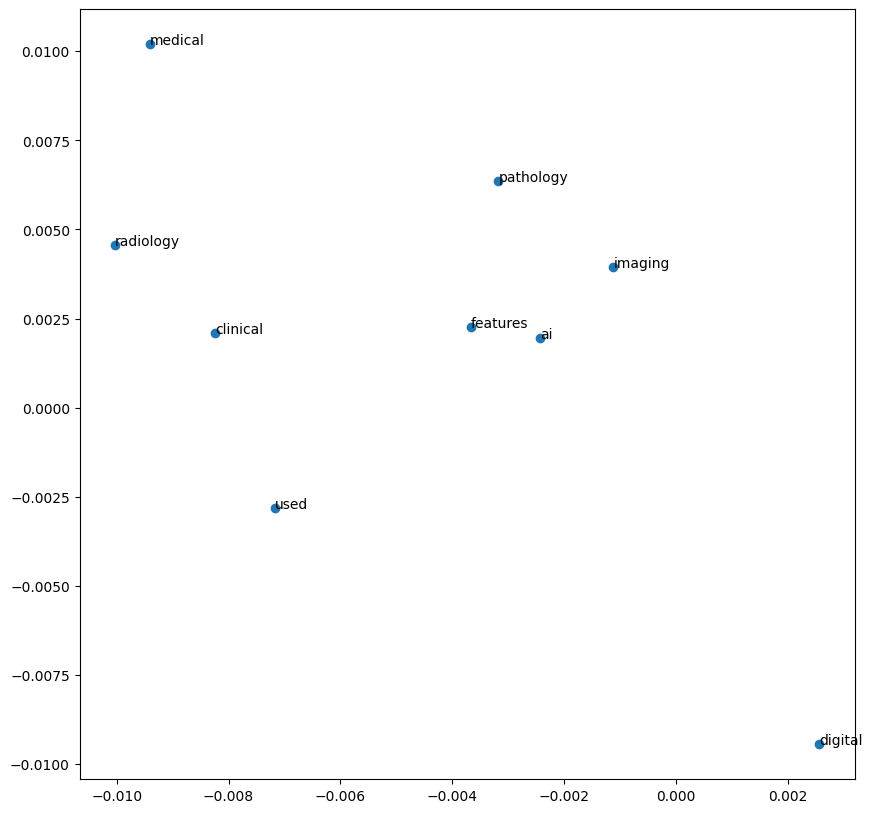

In [17]:
import matplotlib.pyplot as plt

# Word2Vec 임베딩을 시각화하는 함수 생성
def visualize_embeddings(model, terms):
  # 주어진 용어에 대한 벡터 가져오기
  vectors = [model.wv[term] for term in terms]

  # 벡터의 산점도 생성
  plt.figure(figsize=(10,10))
  plt.scatter([vector[0] for vector in vectors], [vector[1] for vector in vectors])

  # 플롯에 레이블 추가
  for term, vector in zip(terms, vectors):
    plt.annotate(term, (vector[0], vector[1]))

  # 플롯 표시
  plt.show()

# 주어진 용어에 대한 Word2Vec 임베딩 시각화
visualize_embeddings(model_radiology, ['ai', 'radiology', 'imaging', 'medical', 'clinical', 'pathology', 'digital', 'features', 'used'])

In [20]:
# 용어 유추 작업 함수 정의 (방사선학 모델)
def term_analogy_task_radiology(model, term1, term2, term3):
  # 주어진 용어에 대한 벡터 가져오기
  vectors = [model.wv[term] for term in [term1, term2, term3]]

  # 두 번째 용어의 벡터에서 세 번째 용어의 벡터를 뺌
  diff_vector = vectors[1] - vectors[2]

  # 첫 번째 용어의 벡터에 diff_vector를 더함
  analogy_vector = vectors[0] + diff_vector

  # analogy_vector에 가장 유사한 용어 찾기
  most_similar_term = model.wv.most_similar(analogy_vector, topn=1)[0][0]

  # 가장 유사한 용어 반환
  return most_similar_term

# 용어 유추 작업 수행
term1 = 'radiology'
term2 = 'ai'
term3 = 'pathology'

analogy_result = term_analogy_task_radiology(model_radiology, term1, term2, term3)
print(f"Term analogy task (Radiology): {term1} : {term2} :: {term3} : {analogy_result}")

Term analogy task (Radiology): radiology : ai :: pathology : ai


In [22]:
# 용어 유추 작업 함수 정의(병리학 모델)
def term_analogy_task_pathology(model, term1, term2, term3):
  # 주어진 용어에 대한 벡터 가져오기
  vectors = [model.wv[term] for term in [term1, term2, term3]]

  # 두 번째 용어의 벡터에서 세 번째 용어의 벡터를 뺌
  diff_vector = vectors[1] - vectors[2]

  # 첫 번째 용어의 벡터에 diff_vector를 더함
  analogy_vector = vectors[0] + diff_vector

  # analogy_vector에 가장 유사한 용어 찾기
  most_similar_term = model.wv.most_similar(analogy_vector, topn=1)[0][0]

  # 가장 유사한 용어 반환
  return most_similar_term

# 용어 유추 작업 수행 (병리학 모델)
term1_pathology = 'pathology'
term2_pathology = 'ai'
term3_pathology = 'radiology'

analogy_result_pathology = term_analogy_task_pathology(model_pathology, term1_pathology, term2_pathology, term3_pathology)
print(f"Term analogy task (Pathology): {term1_pathology} : {term2_pathology} :: {term3_pathology} : {analogy_result_pathology}")

Term analogy task (Pathology): pathology : ai :: radiology : pathology
